# Computing Implied Future Info from Option Quotes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120

import pandas as pd

from volkit.implied.future import implied_future_from_option_quotes
from volkit.implied.future_plot import implied_future_from_option_quotes_plot
from volkit.datasets import spxw

In [2]:
df = spxw(min_vol=1, D=7)
df

,T,D,K,C_bid,C_ask,C_vol,P_bid,P_ask,P_vol
487,0.027778,7,4400,2042.0,2058.20,6,0.0,0.05,510
488,0.027778,7,4600,1842.2,1858.40,3,0.0,0.10,35
540,0.027778,7,6200,250.1,259.80,1,3.1,3.20,1257
542,0.027778,7,6210,243.1,247.20,66,3.4,3.50,276
550,0.027778,7,6250,204.6,208.60,57,5.1,5.20,356
...,...,...,...,...,...,...,...,...,...
785,0.027778,7,6545,9.1,9.30,12,99.6,103.50,3
786,0.027778,7,6550,8.0,8.30,66,103.4,107.50,2
789,0.027778,7,6565,5.4,5.60,114,115.9,119.60,8
790,0.027778,7,6570,4.7,5.00,20,120.1,124.10,3


F,6452.500000
F_bid,6452.200000
F_ask,6452.800000
D_min,0.99477327
D_max,1.00286396


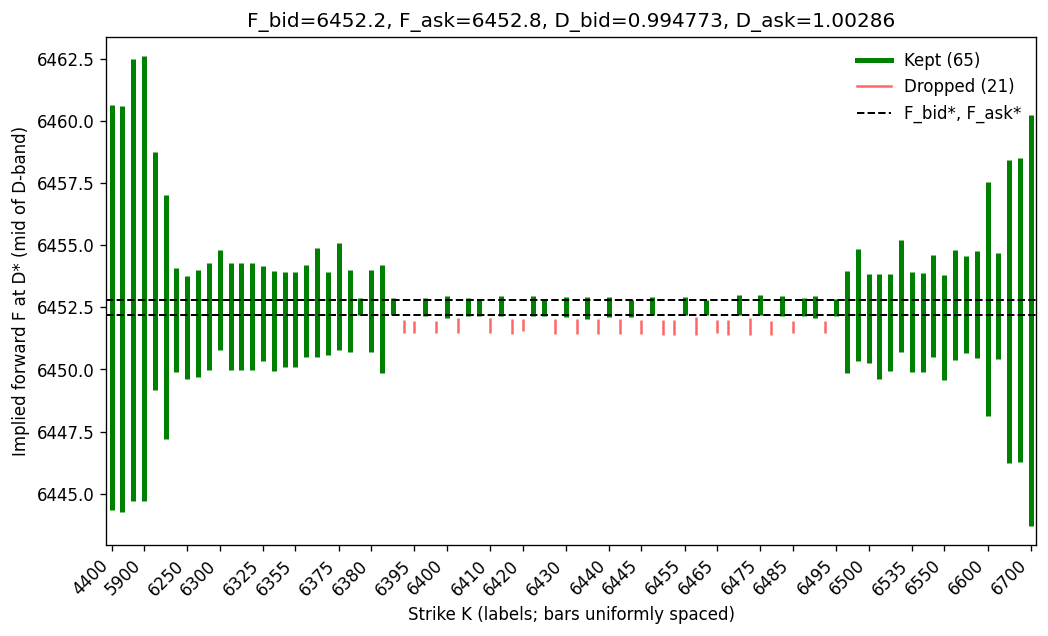

In [3]:
res, valid_mask = implied_future_from_option_quotes(
   df['K'], 
   df['C_bid'], 
   df['C_ask'], 
   df['P_bid'], 
   df['P_ask'],
   plot=True
)

res